# Explore Zenodo community

In [ ]:
from zenodoExplorer.zenexp import ze

recIDs = [10835267, 10712131, 10890165]
with open("api.key", "r") as keyFile:
    ACCESS_TOKEN = keyFile.readline().rstrip()

z = ze(ACCESS_TOKEN, recIDs, cache='~/.zenodo_cache/')
z.read_zdb()
z.zdb.plot()

# Training metrics

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def get_losses(file):
    opt_data = {}
    #eval_data = {}

    # Open file and read contents
    with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            line = line.replace('null', 'None')
            line_dict = eval(line)

            epoch = line_dict['epoch']
            loss = line_dict['loss']

            if 'opt' in line_dict.values():
                try:
                    opt_data[epoch].append(loss)
                except:
                    opt_data[epoch] = [loss]
            #elif 'eval' in line_dict.values():
            #    eval_data[epoch] = loss
    f.close()

    # Data treatment
    avg_loss = [np.average(val) for val in opt_data.values()]
    max_loss = [np.max(val) for val in opt_data.values()]
    min_loss = [np.min(val) for val in opt_data.values()]
    data = {
        'avg. training loss':avg_loss,
        'min. training loss':min_loss,
        'max. training loss':max_loss,
    }
    return data

def eval_results(file):
    #train_data = {'training loss':{}}
    data = {}

    with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            line = line.replace('null', 'None')
            line_dict = eval(line)

            epoch = line_dict['epoch']
            #loss = line_dict['loss']

            if 'eval' in line_dict.values():
                try:
                    # Valid
                    data['validation loss'].append(line_dict['loss'])

                    # Energy
                    data['energy MAE'].append(line_dict['mae_e'])
                    data['energy MAE/atom'].append(line_dict['mae_e_per_atom'])
                    data['energy RMSE'].append(line_dict['rmse_e'])
                    data['energy RMSE/atom'].append(line_dict['rmse_e_per_atom'])
                    data['energy q95'].append(line_dict['q95_e'])

                    data['force MAE'].append(line_dict['mae_f'])
                    data['rel. force MAE'].append(line_dict['rel_mae_f'])
                    data['force RMSE'].append(line_dict['rmse_f'])
                    data['rel. force RMSE'].append(line_dict['rel_rmse_f'])
                    data['force q95'].append(line_dict['q95_f'])
                except:
                    data['validation loss'] = [line_dict['loss']]
                    data['energy MAE'] = [line_dict['mae_e']]
                    data['energy MAE/atom'] = [line_dict['mae_e_per_atom']]
                    data['energy RMSE'] = [line_dict['rmse_e']]
                    data['energy RMSE/atom'] = [line_dict['rmse_e_per_atom']]
                    data['energy q95'] = [line_dict['q95_e']]

                    data['force MAE'] = [line_dict['mae_f']]
                    data['rel. force MAE'] = [line_dict['rel_mae_f']]
                    data['force RMSE'] = [line_dict['rmse_f']]
                    data['rel. force RMSE'] = [line_dict['rel_rmse_f']]
                    data['force q95'] = [line_dict['q95_f']]
    f.close()

    return data

colours = [
    'tab:blue',
    'tab:orange',
    'tab:green',
    'tab:red',
]


In [10]:
paths = {
    'SD22NQ wB97X':'tests/SD22NQ_wB97X/macemodel001_run-789_train.txt',
    'SD22NQQ wB97X':'tests/SD22NQQ_wB97X/macemodel002_run-789_train.txt',
    'SD22NQ B97X':'tests/SD22NQ_B97X/macemodel003_run-789_train.txt',
    'SD22N wB97X':'tests/SD22N_wB97X/model_run-789_train.txt',
}

data = {}
for i, (label, file) in enumerate(paths.items()):
    print(file)
    train_data = get_losses(file)
    eval_data = eval_results(file)
    
    train_df = pd.DataFrame(train_data)
    eval_df = pd.DataFrame(eval_data) 
    print(train_df.columns)
    print(eval_df.columns)

    data[label] = [train_df, eval_df]

tests/SD22NQ_wB97X/macemodel001_run-789_train.txt
Index(['avg. training loss', 'min. training loss', 'max. training loss'], dtype='object')
Index(['validation loss', 'energy MAE', 'energy MAE/atom', 'energy RMSE',
       'energy RMSE/atom', 'energy q95', 'force MAE', 'rel. force MAE',
       'force RMSE', 'rel. force RMSE', 'force q95'],
      dtype='object')
tests/SD22NQQ_wB97X/macemodel002_run-789_train.txt
Index(['avg. training loss', 'min. training loss', 'max. training loss'], dtype='object')
Index(['validation loss', 'energy MAE', 'energy MAE/atom', 'energy RMSE',
       'energy RMSE/atom', 'energy q95', 'force MAE', 'rel. force MAE',
       'force RMSE', 'rel. force RMSE', 'force q95'],
      dtype='object')
tests/SD22NQ_B97X/macemodel003_run-789_train.txt
Index(['avg. training loss', 'min. training loss', 'max. training loss'], dtype='object')
Index(['validation loss', 'energy MAE', 'energy MAE/atom', 'energy RMSE',
       'energy RMSE/atom', 'energy q95', 'force MAE', 'rel. fo

## Losses

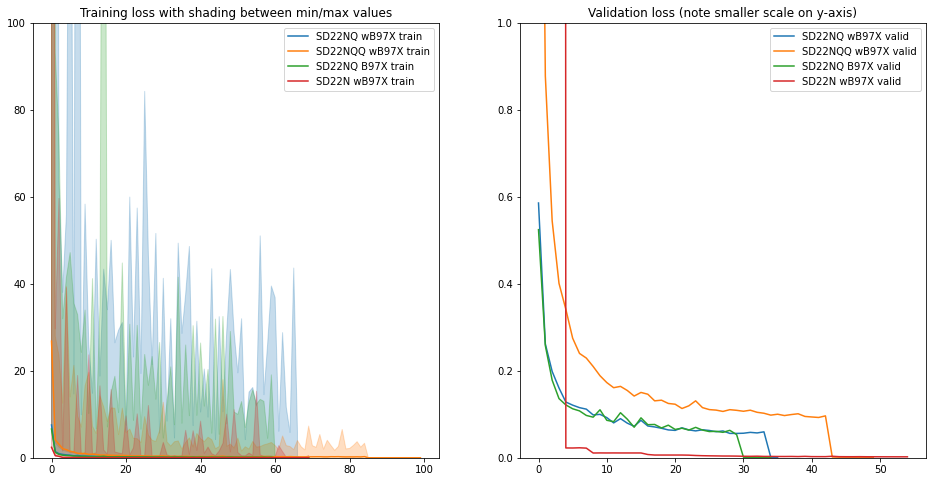

In [23]:
fig, axs = plt.subplots(1,2, figsize=(2*8, 8))

axs[0].set_ylim([0,100])
axs[1].set_ylim([0,1])
axs[0].set_title('Training loss with shading between min/max values')
axs[1].set_title('Validation loss (note smaller scale on y-axis)')
for i, (data_set, train_eval) in enumerate(data.items()):
    train_df, eval_df = train_eval
    axs[0].plot(
        train_df.index,
        train_df['avg. training loss'],
        color=colours[i],
        label=data_set+' train',
    )
    axs[0].fill_between(
        train_df.index,
        train_df['avg. training loss']-train_df['min. training loss'],
        train_df['avg. training loss']+train_df['max. training loss'],
        color=colours[i],
        alpha=0.25,
    )
    axs[1].plot(
        eval_df.index,
        eval_df['validation loss'],
        color=colours[i],
        label=data_set+' valid',
    )

    axs[0].legend(); axs[1].legend()

## Energy metrics

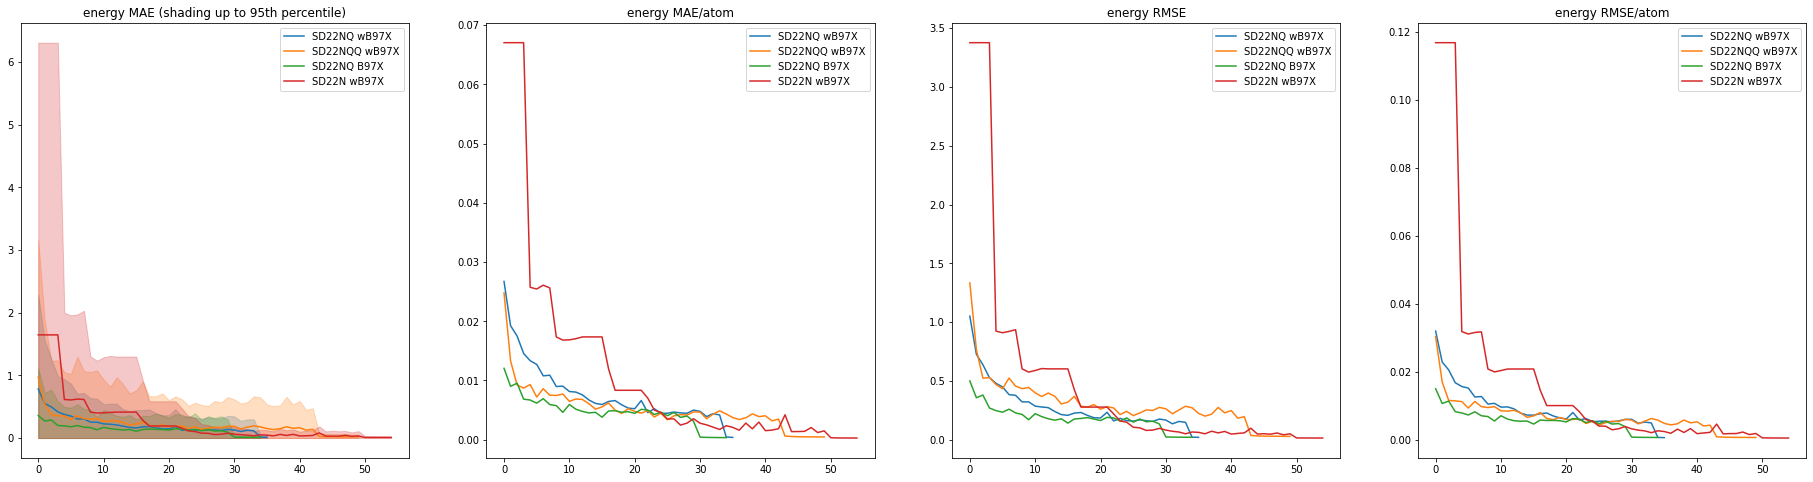

In [31]:
fig, axs = plt.subplots(1,4, figsize=(4*8, 8))

for i, (data_set, train_eval) in enumerate(data.items()):
    _, eval_df = train_eval
    for ax, metric in zip(axs, eval_df.columns[1:]):
        title = metric
        if metric != 'energy q95':
            ax.plot(
                eval_df.index,
                eval_df[metric],
                color=colours[i],
                label=data_set,
            )
            if metric == 'energy MAE':
                title += ' (shading up to 95th percentile)'
                ax.fill_between(
                    eval_df.index,
                    #eval_df[metric],
                    eval_df['energy q95'],
                    color=colours[i],
                    alpha=0.25,
                )
        ax.set_title(title)
        ax.legend()

## Force metrics

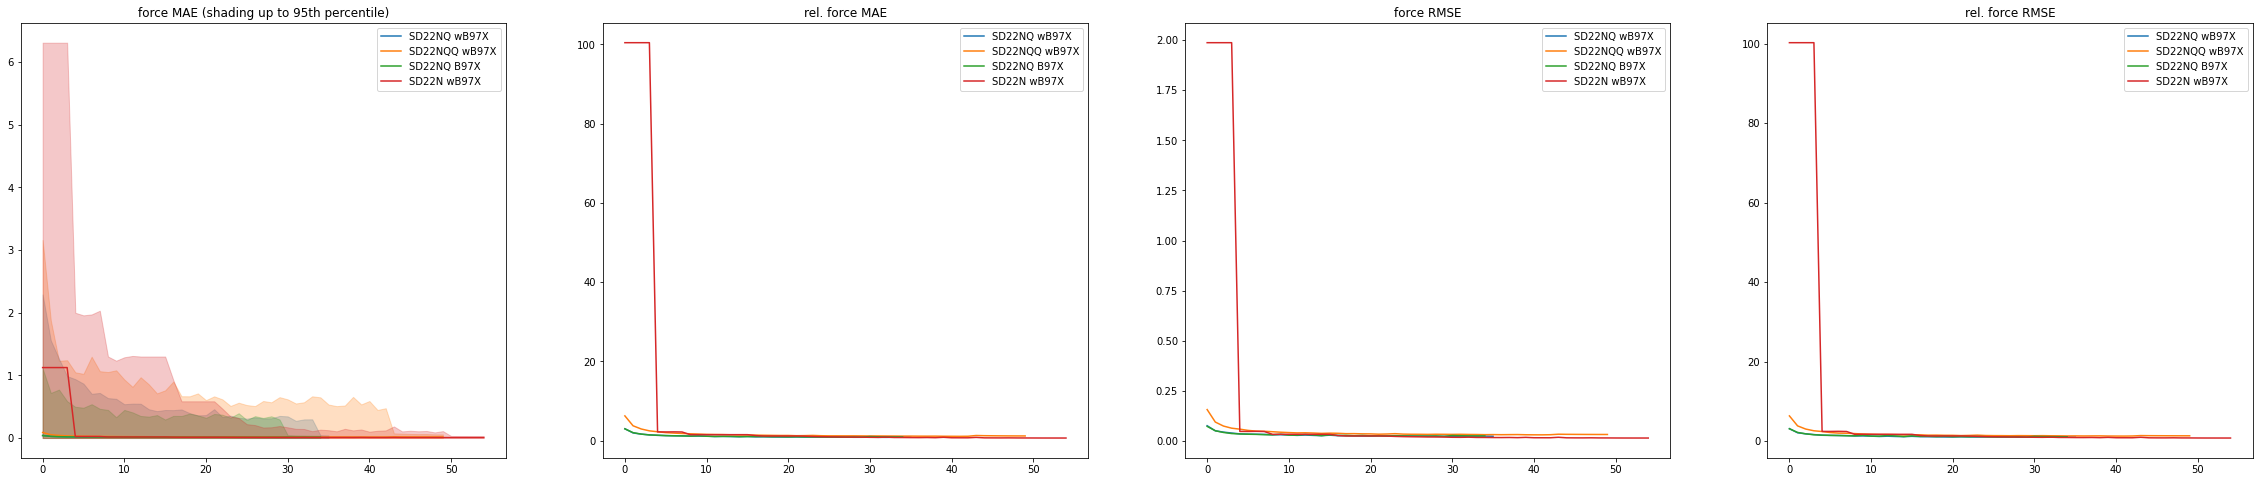

In [32]:
fig, axs = plt.subplots(1,4, figsize=(5*8, 8))

for i, (data_set, train_eval) in enumerate(data.items()):
    _, eval_df = train_eval
    for ax, metric in zip(axs, eval_df.columns[6:]):
        title = metric
        if metric != 'force q95':
            ax.plot(
                eval_df.index,
                eval_df[metric],
                color=colours[i],
                label=data_set,
            )
            if metric == 'force MAE':
                title += ' (shading up to 95th percentile)'
                ax.fill_between(
                    eval_df.index,
                    #eval_df[metric],
                    eval_df['energy q95'],
                    color=colours[i],
                    alpha=0.25,
                )
        ax.set_title(title)
        ax.legend()

# Identifying possible outlier structures

In [73]:
from ase.io import read,iread

atoms = iread('tests/SD22NQ_wB97X/SD22NQ_wB97XD3BJ_Psi4.xyz', ':')
isolated_atoms = [a for a in atoms if a.info['Nmols'] == 1]
isolated_energies = [a.get_potential_energy() for a in isolated_atoms]
num_isolated = len(isolated_atoms)

In [78]:
import json

def config_ediffs(atoms, config, energy):
    output = []
    for a in atoms:
        if (a.info['config_type'] == config):
            aenergy = a.get_potential_energy()
            output.append(energy-aenergy)
    
    return output

ediffs = {at.info['config_type']:config_ediffs(isolated_atoms, at.info['config_type'], energy) for i, (at, energy) in enumerate(zip(isolated_atoms,isolated_energies)) if i < num_isolated}

with open('ediffs.json', 'w') as f:
    json.dump(ediffs, f)
f.close()

In [124]:
import json

with open('ediffs.json', 'r') as f:
    ediffs = json.load(f)
f.close()
print(ediffs.keys())

ediffs_df = pd.DataFrame(series[0], columns=[list(ediffs.keys())[0]])
for key,vals in ediffs.items():
    if key not in ediffs_df.columns:
        ediffs_df[key] = pd.Series(vals)
print(ediffs_df)

dict_keys(['EMC', 'VC', 'PC', 'DEC', 'DMC', 'EC'])
          EMC        VC        PC       DEC       DMC        EC
0    0.316681 -1.459603  0.627521  0.366061 -0.940078 -0.659936
1    0.883458 -0.547695  0.706353 -0.467143 -1.179960  0.109210
2    0.669658 -3.214747 -6.833037  0.721073 -0.292538  0.144499
3    1.023443 -0.475492  1.189404 -2.041543 -1.037904  0.024321
4    0.708079 -0.427277  1.717122 -0.084511 -0.063489 -0.283022
..        ...       ...       ...       ...       ...       ...
882  1.096311       NaN  1.936028  0.042445 -0.468874  0.207530
883  0.251919       NaN  1.250123 -0.374947 -0.179864 -0.103670
884  0.604320       NaN  1.393499 -0.981252 -2.070351  0.415687
885  1.035224       NaN  1.650045 -0.618793 -0.878743  0.127362
886  0.000000       NaN  0.730460 -0.675553 -0.749721 -0.170815

[887 rows x 6 columns]


In [128]:
import copy


print('Largest absolute energy-difference within is molecular species:')
print(abs(ediffs_df).max(skipna=True))

ediffs_std_df = copy.deepcopy(ediffs_df)

# Standardise:
for col in ediffs_df.columns:
    ediffs_std_df[col] = (ediffs_df[col]-ediffs_df[col].mean())/ediffs_df[col].std()

print('\nLargest absolute energy difference on standardised data:')
print(abs(ediffs_std_df).max(skipna=True))

Largest absolute energy-difference within is molecular species:
EMC    2.885287
VC     7.541097
PC     8.911802
DEC    3.935111
DMC    6.773130
EC     0.960245
dtype: float64

Largest absolute energy difference on standardised data:
EMC    6.409259
VC     7.786808
PC     5.805029
DEC    4.605069
DMC    6.863390
EC     3.760524
dtype: float64


887


'EC'

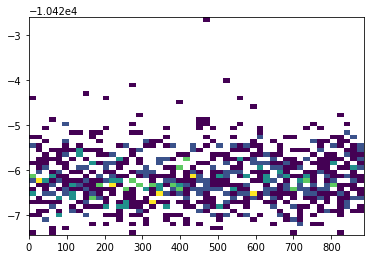

In [149]:
isolated_EMC = [a for a in isolated_atoms if a.info['config_type'] == 'EMC']

emc_energies = [a.get_potential_energy() for a in isolated_EMC]
print(len(emc_energies))
ids = np.arange(len(emc_energies))
#print(emc_energies)

plt.hist2d(ids, emc_energies, cmin=1, bins=50)
col


In [177]:
from ase.io import write
from ase.visualize import view

sub = isolated_EMC[460:460+4]
e = [a.get_potential_energy() for a in sub]
print(e)
write('isolated_emc.xyz', sub)

print(sub[2])


[-10426.695766265522, -10426.823037570386, -10422.611471579945, -10426.651471137395]
Atoms(symbols='CO3C3H8', pbc=False, molID=..., calculator=SinglePointCalculator(...))


### Biggest offender to the right
![isolated_emc](./isolated_emc.PNG)

# Force correlations

## Inter/intra

In [1]:
from ase.io import read,iread
from aseMolec import pltProps as pp
from aseMolec import anaAtoms as aa

SD22NQ_psi4_wB97 = iread('tests/SD22NQ_wB97X/SD22NQ_wB97XD3BJ_Psi4.xyz', ':')
SD22NQ_mace_wB97 = iread('tests/SD22NQ_wB97X/SD22NQ_wB97XD3BJ_MACE.xyz', ':')


### Largest clusters (6)

In [2]:
db1 = [a for a in SD22NQ_psi4_wB97 if a.info['Nmols'] == 6]
db2 = [a for a in SD22NQ_mace_wB97 if a.info['Nmols'] == 6]

In [7]:
print(db1[0])
print(db2[0])
#print(SD22NQ_mace_wB97)
x = aa.extract_molecs(db1, intra_inter=True)
#x = aa.extract_molecs(SD22NQ_mace_wB97, intra_inter=True)
#aa.extract_molecs(db2, intra_inter=True, forces_key='MACE_forces')
#y = aa.extract_molecs(db2, intra_inter=True)
#pp.plot_trans_rot_vib(x, y, labs=['Psi4', 'MACE'])


Atoms(symbols='C22H40O18', pbc=False, molID=..., calculator=SinglePointCalculator(...))
Atom('C', [-4.2924509, -4.04848957, 1.37887275], index=0)
Atom('O', [-3.26968861, -5.12505817, 1.52923071], index=1)
Atom('C', [-2.33604574, -4.73066521, 2.43648767], index=2)
Atom('O', [-2.53037262, -3.43919039, 2.83791685], index=3)
Atom('C', [-3.76507068, -2.85006046, 2.2498107], index=4)
Atom('H', [-4.17287779, -3.75537133, 0.35303876], index=5)
Atom('H', [-5.25921774, -4.44327927, 1.70187879], index=6)
Atom('O', [-1.50212169, -5.58874655, 2.82862782], index=7)
Atom('H', [-3.47999167, -1.9043833, 1.88354671], index=8)
Atom('H', [-4.44868755, -2.53129244, 2.99857378], index=9)
Atom('C', [0.20496827, 1.63178468, -1.51131725], index=10)
Atom('O', [-0.28427273, 2.87096071, -1.07337427], index=11)
Atom('C', [-0.02412772, 2.95170069, 0.22488475], index=12)
Atom('O', [0.5524103, 1.8066467, 0.67681575], index=13)
Atom('C', [0.45628628, 0.68494463, -0.31824124], index=14)
Atom('H', [-0.46004373, 1.146511

ValueError: need at least one array to concatenate

## Model trained on clusters evaluated on periodic structures vs dft

In [ ]:
z.read_dat_files('ml1@10712131')
z.read_dat_files('td2@10835267')
# Collect zip from repo
loc1 = z.get_chunk(10712131, 'TestData_MACE_IBM23_B97.zip')
loc2 = z.get_chunk(10712131, 'TestData_MACE_SD22NQ_B97.zip')

198555 198555 198555 198555


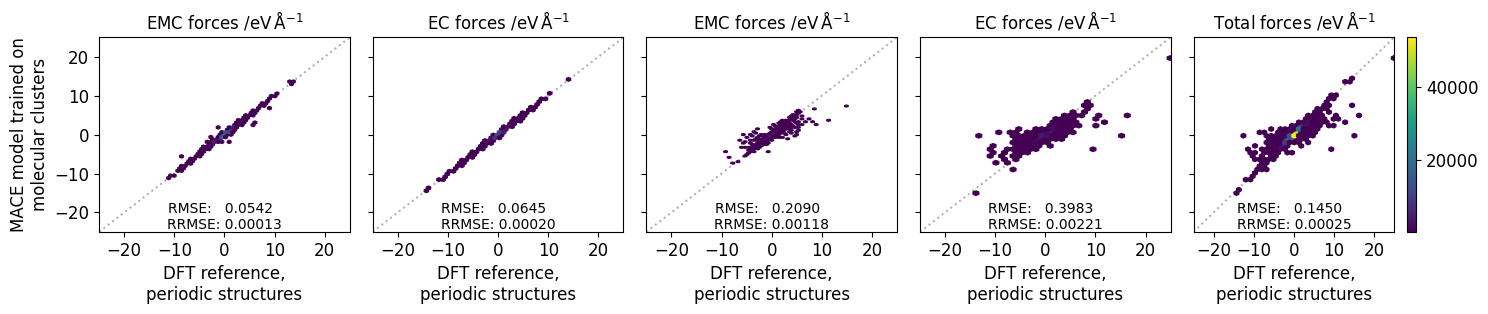

In [3]:
import copy, math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

from ase.io import read, iread, write


# INDICES PERTAINING TO VOLUME SCANS IN THE DATASET
volume_scans = np.arange(757,846)

# Read data
cluster_reference = iread(loc1+'/IBM23_B97.xyz', ':')
cluster = iread(loc1+'/IBM23_mace.xyz', ':')


# ONLY WORKS FOR SORTED ATOMS-OBJECTS
def molID_counter(arr):
    """Counts the number of serial occurences of a molID in a 1-D array of 
    molID's and returns an array of counts, equal in length to the input.

    The function compares every element to the previous one. If they are the 
    same, increment the count by one and add the index to a temporary list.
    If they are not the same, create a copy of the temporary list where each
    element is equal to the total count of the last sequence and add it to
    'counts' whilst also resetting the current count.

    For example, this will result in:
    $ arr = [0,0,1,1,1,0,0,0,0]
    $ print(arr)
    [2,2,3,3,3,4,4,4,4]
    
    The last count sequence is added when the (i+1)th element cannot be
    selected."""
    counts = []
    count = 1
    for i, a in enumerate(arr):
        if i > 0:
            prev = arr[i-1]
            if a == prev:
                last_indices.append(i)
                count += 1
            else:
                counts += [count for _ in last_indices]
                last_indices = [i]
                count = 1
        else:
            last_indices = [0]

        # Adds last count array
        try:
            forward = arr[i+1]
        except:
            counts += [count for _ in last_indices]
    return counts


def unique_molID_counter(arr):
    """Counts the number of unique occurrences in a list and returns an equally
    long list where the ID has been replaced by frequency.

    Can only be applied on list objects that contain UNIQUE IDs."""
    unique_val, unique_count = np.unique(arr, return_counts=True)
    unique_map = {k:v for k,v in zip(unique_val, unique_count)}
    
    return [unique_map[a] for a in arr]


# Set y-axis limits
xy_range = [-25,25]
alpha=0.3
fsize = 12
grid_width = 20


se = {}
rse = {}
counts = {}
grid_size = (math.floor(np.sqrt(3)*grid_width), grid_width)

plt.rcParams.update({'font.size': fsize})


# DATA COLLECTION
cluster_forces, cluster_reference_forces, configs, vscan = [],[],[],[]
for i, (clst, ref) in enumerate(zip(cluster, cluster_reference)):
    cluster_forces.extend(clst.arrays['forces'].flatten())
    cluster_reference_forces.extend(ref.arrays['forces'].flatten())

    if i in volume_scans:
        vscan_bool = [1 for _ in clst.arrays['forces'].flatten()]
    else:
        vscan_bool = [0 for _ in clst.arrays['forces'].flatten()]
    vscan.extend(vscan_bool)

    cluster_config = unique_molID_counter(clst.arrays['molID'])
    configs.extend(cluster_config+cluster_config+cluster_config)

cluster_df = pd.DataFrame(
    {
        'cluster reference':cluster_reference_forces,
        'cluster forces':cluster_forces,
        'config':configs,
        'vscan':vscan,
    }
)

print(
    len(cluster_forces),
    len(cluster_reference_forces),
    len(configs),
    len(vscan)
)

# PLOTTING
fig, axs = plt.subplots(1,5, sharey=True, sharex=True, figsize=(15.15,3.3))

rmse = (np.sum((cluster_df['cluster forces']-cluster_df['cluster reference'])**2)/len(cluster_df['cluster reference']))**0.5
rrmse = rmse/(np.sum((cluster_df['cluster forces']-np.average(cluster_df['cluster forces']))**2))**0.5


#regular_structures = cluster_df[cluster_df['vscan'] == 0]
#vscans = cluster_df[cluster_df['vscan'] == 1]

#regular_ec_mace = regular_structures['cluster forces'][cluster_df['config'] == 10]
#regular_ec_dft = regular_structures['cluster reference'][cluster_df['config'] == 10]
#l = np.mean((l-k)**2)
#print(r**0.5)




axs[4].set_title(f'Total forces /eV$\,$Å$^{{-1}}$', fontsize=fsize)
lastim = axs[4].hexbin(
    cluster_df['cluster reference'],
    cluster_df['cluster forces'],
    mincnt=1,
    gridsize=grid_size,
    #norm=norm,
)
cbar = fig.colorbar(
    lastim,
    #ax=axs[4],
    #pad=0.5,
)
axs[4].annotate(
    f'RMSE:   {rmse:.4f}  \nRRMSE: {rrmse:.5f}',
    (0, xy_range[0]),
    fontsize=fsize-2,
    ha='center',
    va='bottom'
)

counts = lastim.get_array()
norm = mpl.colors.Normalize(vmin=1, vmax=max(counts), clip=False)


for ax in axs:
    ax.plot(xy_range, xy_range, 'k:', alpha=alpha, zorder=0)
    ax.set_xlim(xy_range)
    ax.set_ylim(xy_range)
    ax.set_xlabel('DFT reference,\nperiodic structures')
axs[0].set_ylabel(f'MACE model trained on\nmolecular clusters')



for vbool, vgroup in cluster_df.groupby('vscan'):
    #print('vscan:', vbool)
    for mol, cgroup in vgroup.groupby('config'):
        x = cgroup['cluster reference']
        y = cgroup['cluster forces']
        
        rmse = (np.sum((x-y)**2)/len(x))**0.5
        rrmse = rmse/(np.sum((x-np.average(x))**2))**0.5
        #print(mol, rmse, rrmse)

        if vbool == 0:
            if mol == 15:
                axs[0].set_title(f'EMC forces /eV$\,$Å$^{{-1}}$', fontsize=fsize)
                axs[0].hexbin(
                    x,
                    y,
                    mincnt=1,
                    gridsize=grid_size,
                    norm=norm,
                )
                axs[0].annotate(
                    f'RMSE:   {rmse:.4f}  \nRRMSE: {rrmse:.5f}',
                    (0, xy_range[0]),
                    fontsize=fsize-2,
                    ha='center',
                    va='bottom'
                )
            elif mol == 10:
                axs[1].set_title(f'EC forces /eV$\,$Å$^{{-1}}$', fontsize=fsize)
                axs[1].hexbin(
                    x,
                    y,
                    mincnt=1,
                    gridsize=grid_size,
                    norm=norm,
                )
                axs[1].annotate(
                    f'RMSE:   {rmse:.4f}  \nRRMSE: {rrmse:.5f}',
                    (0, xy_range[0]),
                    fontsize=fsize-2,
                    ha='center',
                    va='bottom'
                )

        else:
            if mol == 15:
                axs[2].set_title(f'EMC forces /eV$\,$Å$^{{-1}}$', fontsize=fsize)
                axs[2].hexbin(
                    x,
                    y,
                    mincnt=1,
                    gridsize=grid_size,
                    norm=norm,
                )
                axs[2].annotate(
                    f'RMSE:   {rmse:.4f}  \nRRMSE: {rrmse:.5f}',
                    (0, xy_range[0]),
                    fontsize=fsize-2,
                    ha='center',
                    va='bottom'
                )
            elif mol == 10:
                axs[3].set_title(f'EC forces /eV$\,$Å$^{{-1}}$', fontsize=fsize)
                axs[3].hexbin(
                    x,
                    y,
                    mincnt=1,
                    gridsize=grid_size,
                    norm=norm,
                )
                axs[3].annotate(
                    f'RMSE:   {rmse:.4f}  \nRRMSE: {rrmse:.5f}',
                    (0, xy_range[0]),
                    fontsize=fsize-2,
                    ha='center',
                    va='bottom'
                )


plt.tight_layout()


## Model trained on periodic structure evaluated on clusters vs dft

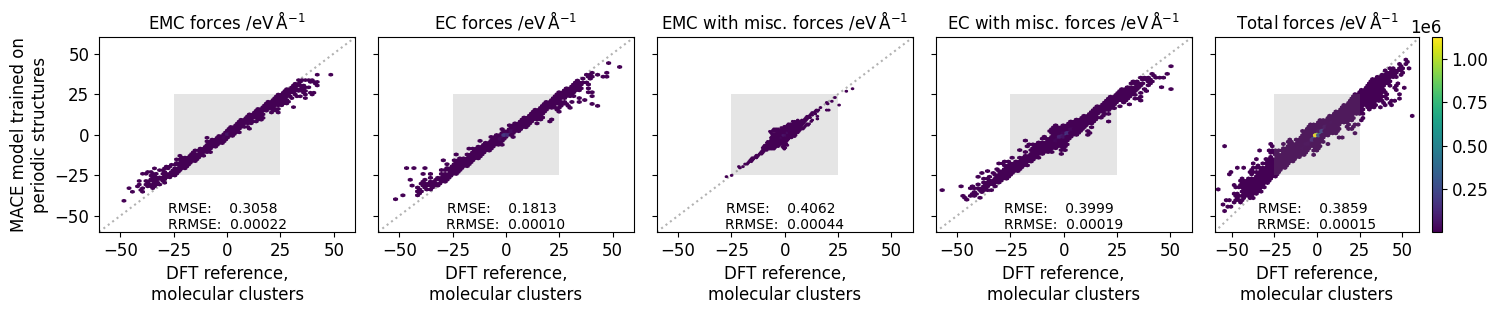

In [4]:
from matplotlib.patches import Rectangle

# Read data
periodic_reference= iread(loc2+'/SD22NQ_B97.xyz', ':')
periodic = iread(loc2+'/SD22NQ_mace.xyz', ':')


ec = 'EC forces'
emc = 'EMC forces'
with_ec = 'EC with misc. forces'
with_emc = 'EMC with misc. forces'
total = 'Total forces'
fsize = 12
grid_width = 35
xy_range = -60, 60


# DATA COLLECTION
periodic_forces, periodic_reference_forces, configs, nmols = [],[],[],[]
for per, ref in zip(periodic, periodic_reference):
    # Collect forces
    periodic_forces.extend(per.arrays['forces'].flatten())
    periodic_reference_forces.extend(ref.arrays['forces'].flatten())
    
    # Collect config types to associate with forces in a table
    ctype = ref.info['config_type']
    conf = [ctype for _ in ref.arrays['forces'].flatten()]
    configs.extend(conf)

    N = ref.info['Nmols']
    nums = [N for _ in ref.arrays['forces'].flatten()]
    nmols.extend(nums)

periodic_df = pd.DataFrame(
    {
        'periodic reference':periodic_reference_forces,
        'periodic forces':periodic_forces,
        'config_type':configs,
        'nmols':nmols
    }
)

# DATA STORAGE
se = {}
rse = {}
counts = {}
grid_size = math.ceil(np.sqrt(3)*grid_width), grid_width
dat = {'x':[], 'y':[]}
emc_dat, emc_misc_dat = copy.deepcopy(dat), copy.deepcopy(dat)
ec_dat, ec_misc_dat = copy.deepcopy(dat), copy.deepcopy(dat)



# SE DETERMINATION
group_df = periodic_df.groupby(by='config_type')
for i, grp in enumerate(group_df):
    config = grp[0]
    n = grp[1]['nmols'].iloc[0]
    x = grp[1]['periodic reference']
    y = grp[1]['periodic forces']
    
    if ':' not in config:
        # Only EMC
        if 'EMC' in config:
            # SE
            if emc not in se.keys():
                se[emc], rse[emc], counts[emc] = 0,0,0
            se[emc] += np.sum((x-y)**2)
            rse[emc] += np.sum((x-np.average(x))**2)
            counts[emc] += len(x)

            # PLOT DATA
            emc_dat['x'].extend(x); emc_dat['y'].extend(y)

        # Only EC
        if 'EC' in config:
            # SE
            if ec not in se.keys():
                se[ec], rse[ec], counts[ec] = 0,0,0
            se[ec] += np.sum((x-y)**2)
            rse[ec] += np.sum((x-np.average(x))**2)
            counts[ec] += len(x)

            # PLOT DATA
            ec_dat['x'].extend(x); ec_dat['y'].extend(y)

    else:
        # EMC + misc
        if ('EMC' in config) and ('EC' not in config):
            # SE
            if with_emc not in se.keys():
                se[with_emc], rse[with_emc], counts[with_emc] = 0,0,0
            se[with_emc] += np.sum((x-y)**2)
            rse[with_emc] += np.sum((x-np.average(x))**2)
            counts[with_emc] += len(x)

            # PLOT DATA
            emc_misc_dat['x'].extend(x); emc_misc_dat['y'].extend(y)
            
        # EC + misc
        if ('EMC' not in config) and ('EC' in config):
            # SE
            if with_ec not in se.keys():
                se[with_ec], rse[with_ec], counts[with_ec] = 0,0,0
            se[with_ec] += np.sum((x-y)**2)
            rse[with_ec] += np.sum((x-np.average(x))**2)
            counts[with_ec] += len(x)

            # PLOT DATA
            ec_misc_dat['x'].extend(x); ec_misc_dat['y'].extend(y)
            
        # Total se
        if total not in se.keys():
            se[total], rse[total], counts[total] = 0,0,0
        se[total] += np.sum((x-y)**2)
        rse[total] += np.sum((x-np.average(x))**2)
        counts[total] += len(x)


# PLOT
fig, axs = plt.subplots(1,5, sharey=True, sharex=True, figsize=(15.15,3.3))
plt.rcParams.update({'font.size': fsize})
norm = mpl.colors.Normalize(vmin=0, vmax=len(periodic_df['periodic reference']), clip=False)

auxiliary_range = [-25,25]
aux_pos = auxiliary_range[0], auxiliary_range[0]
aux_width = 2*auxiliary_range[1]

mse = {key:np.sum(val)/counts[key] for key, val in se.items()}
rrmse = {key:np.sqrt(mse[key]/val) for key, val in rse.items()}

axs[4].set_title(total+' /eV$\,$Å$^{{-1}}$', fontsize=fsize)
lastim = axs[4].hexbin(
    periodic_df['periodic reference'],
    periodic_df['periodic forces'],
    mincnt=1,
    gridsize=grid_size,
    #norm=norm,
)
cbar = fig.colorbar(
    lastim,
    ax=axs[4],
)
axs[4].annotate(
    f'RMSE:    {np.sqrt(mse[total]):.4f}  \nRRMSE:  {rrmse[total]:.5f}',
    (0, xy_range[0]),
    fontsize=fsize-2,
    ha='center',
    va='bottom'
)
counts = lastim.get_array()
norm = mpl.colors.Normalize(vmin=1, vmax=max(counts), clip=False)

for ax in axs:
    ax.plot(xy_range, xy_range, 'k:', alpha=0.3, zorder=0)
    ax.set_xlim(xy_range)
    ax.set_ylim(xy_range)
    ax.set_xlabel('DFT reference,\nmolecular clusters')
    ax.add_patch(
        Rectangle(
            aux_pos,
            aux_width,
            aux_width,
            facecolor='gray',
            alpha=0.2,
        )
    )
axs[0].set_ylabel('MACE model trained on\nperiodic structures')

axs[0].set_title(emc+' /eV$\,$Å$^{{-1}}$', fontsize=fsize)
axs[0].hexbin(
    emc_dat['x'],
    emc_dat['y'],
    mincnt=1,
    gridsize=grid_size,
    norm=norm,
)
axs[0].annotate(
    f'RMSE:    {np.sqrt(mse[emc]):.4f}  \nRRMSE:  {rrmse[emc]:.5f}',
    (0, xy_range[0]),
    fontsize=fsize-2,
    ha='center',
    va='bottom'
)

axs[1].set_title(ec+' /eV$\,$Å$^{{-1}}$', fontsize=fsize)
axs[1].hexbin(
    ec_dat['x'],
    ec_dat['y'],
    mincnt=1,
    gridsize=grid_size,
    norm=norm,
)
axs[1].annotate(
    f'RMSE:    {np.sqrt(mse[ec]):.4f}  \nRRMSE:  {rrmse[ec]:.5f}',
    (0, xy_range[0]),
    fontsize=fsize-2,
    ha='center',
    va='bottom'
)

axs[2].set_title(with_emc+' /eV$\,$Å$^{{-1}}$', fontsize=fsize)
axs[2].hexbin(
    emc_misc_dat['x'],
    emc_misc_dat['y'],
    mincnt=1,
    gridsize=grid_size,
    norm=norm,
)
axs[2].annotate(
    f'RMSE:    {np.sqrt(mse[with_emc]):.4f}  \nRRMSE:  {rrmse[with_emc]:.5f}',
    (0, xy_range[0]),
    fontsize=fsize-2,
    ha='center',
    va='bottom'
)

axs[3].set_title(with_ec+' /eV$\,$Å$^{{-1}}$', fontsize=fsize)
axs[3].hexbin(
    ec_misc_dat['x'],
    ec_misc_dat['y'],
    mincnt=1,
    gridsize=grid_size,
    norm=norm,
)
axs[3].annotate(
    f'RMSE:    {np.sqrt(mse[with_ec]):.4f}  \nRRMSE:  {rrmse[with_ec]:.5f}',
    (0, xy_range[0]),
    fontsize=fsize-2,
    ha='center',
    va='bottom'
)


plt.tight_layout()